# EDSA Apple Price Challenge
#### Team TS5 Regression

## Challenge description

Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

  Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.
  
  With this context, we are challenged to construct a regression algorithm, by EDSA, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters.


## Outline

## Introduction

In this report, the aim is to construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost, given certain parameters. 

  To achieve this, we will Goal perform a pre-modeling/modeling of work, exploratory data, and investigate the importance of data preprocessing, feature exploration, and feature engineering on model performace.
  
  Python libraries used:
* Numpy
* Pandas
* Sci-kit learn
* Matplotlib
* Almost entire workflow is covered by these four libraries

# Importing Libraries

We will be importing a few python libraries.

In [1]:





# Visualisations  ''''''''''''''''testing testing!!!!!!!!!!!!!!!!!!!!!!ppppdddd
#import missingno

import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np

We will be loading our data as a Pandas Dataframe. For this challenge we will be using `EDSA Apple Price Challenge` dataset.

In [2]:
train = pd.read_csv(r'https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/df-train_set.csv')

In [3]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


We look at the top rows of our data in order to see the features as well as the types of data we are working with.



# Data Cleaning

If we want to build some relationship between variables that are likely to indicate the average price per kg of Golden Delicious Apples, we really only want to consider the sales which involved Golden Delicious Apples to build this relationship:

In [3]:
train_data = train.copy()
train_data = train_data[train_data['Commodities']=='APPLE GOLDEN DELICIOUS']
train_data.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [5]:
train_data.shape

(1952, 13)

The shape command shows us we have 1952 rows and 13 columns.

Let's check if we have any unique values in our columns.

In [6]:
train_data.nunique()

Province               7
Container             11
Size_Grade            10
Weight_Kg              9
Commodities            1
Date                 147
Low_Price             94
High_Price            88
Sales_Total         1324
Total_Qty_Sold       505
Total_Kg_Sold        850
Stock_On_Hand        735
avg_price_per_kg     601
dtype: int64

We do not need columns with cardinality of 1. We can remove the column with an iterator.

In [7]:
train_data = train_data.drop('Commodities', axis=1) 

### Summary Statistics

Let's explore the data types and the summary statistics of our variables.

We'll start by looking at the data types and number of entries of each column.

In [8]:
# Checking basis information about column types and null values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 12 columns):
Province            1952 non-null object
Container           1952 non-null object
Size_Grade          1952 non-null object
Weight_Kg           1952 non-null float64
Date                1952 non-null object
Low_Price           1952 non-null float64
High_Price          1952 non-null float64
Sales_Total         1952 non-null float64
Total_Qty_Sold      1952 non-null int64
Total_Kg_Sold       1952 non-null float64
Stock_On_Hand       1952 non-null int64
avg_price_per_kg    1952 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 198.2+ KB


The info command confirms our categorial and numerial features. We have 1952 samples in our dataset. Data is organized in 12 columns. From this, we can see that there are no null values in our data.

Now let's look at a table showcasing the summary statistics of the numeric data.

In [9]:
train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Now it's time to remove further missing data and outliers. We will use quantiles of 1% or/and 99% for outliers detection. We consider this method more appropriate than IQR score this time as IQR method would not work well for data concerning apple products. 25% and 75% quantiles differ only by one unit.

In [6]:
#print(f'99% of observations in Low_Price are lower than {train_data["Low_Price"].quantile(0.99)}')

99% of observations in Low_Price are lower than 2000.0


In [832]:
# Removing outliers
#train_data = train_data.query('Low_Price < 2000')

In [8]:
#print(f'99% of observations in Sales_Total are higher than {train_data["Sales_Total"].quantile(0.01)} \
#and lower than {train_data["Sales_Total"].quantile(0.99)}')

99% of observations in Sales_Total are higher than 20.0 and lower than 194376.8


In [833]:
# Removing outliers
#train_data = train_data.query('(Sales_Total > 20.0) & (Sales_Total < 194376.8)')

In [10]:
#print(f'99% of observations in Total_Kg_Sold are higher than {train_data["Total_Kg_Sold"].quantile(0.01)} \
#and lower than {train_data["Total_Kg_Sold"].quantile(0.99)}')

99% of observations in Total_Kg_Sold are higher than 9.0 and lower than 19668.787999999993


In [834]:
# Removing outliers
#train_data = train_data.query('(Total_Kg_Sold > 9.0) & (Total_Kg_Sold < 19668.787999999993)')

In [10]:
#print(f'99% of observations in Stock_On_Hand are higher than {train_data["Stock_On_Hand"].quantile(0.01)} \
#and lower than {train_data["Stock_On_Hand"].quantile(0.99)}')

In [836]:
# Removing outliers
#train_data = train_data.query('(Stock_On_Hand > 0.0) & (Stock_On_Hand < 3535.1999999999994)')

In [837]:
#train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 1 to 64310
Data columns (total 12 columns):
Province            1453 non-null object
Container           1453 non-null object
Size_Grade          1453 non-null object
Weight_Kg           1453 non-null float64
Date                1453 non-null object
Low_Price           1453 non-null float64
High_Price          1453 non-null float64
Sales_Total         1453 non-null float64
Total_Qty_Sold      1453 non-null int64
Total_Kg_Sold       1453 non-null float64
Stock_On_Hand       1453 non-null int64
avg_price_per_kg    1453 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 147.6+ KB


Our dataset has been signifincatly reduced, however it was necessary for purpose of the data cleaning. 

In [73]:
#train_data.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,26.893187,131.516173,165.011012,16375.093599,157.451480,2265.323469,450.147970,7.156930
std,71.294077,241.321424,298.088254,25520.151918,231.130358,3332.848610,593.672381,2.089546
min,3.000000,2.000000,10.000000,30.000000,1.000000,11.000000,1.000000,1.110000
25%,9.000000,55.000000,65.000000,1362.000000,14.000000,204.000000,70.000000,5.710000
50%,12.000000,84.000000,112.000000,5680.000000,64.000000,852.000000,222.000000,7.050000
75%,18.300000,120.000000,160.000000,20440.000000,202.000000,2940.000000,569.000000,8.610000
max,400.000000,1900.000000,2200.000000,183066.000000,1616.000000,19600.000000,3482.000000,21.240000


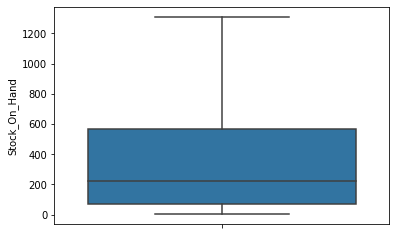

In [77]:
_ = sns.boxplot(data=train_data, y='Stock_On_Hand', showfliers=False)

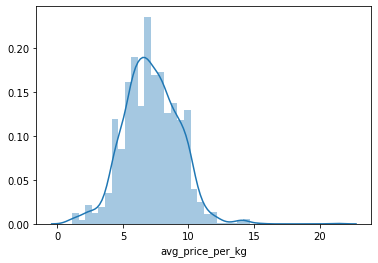

In [80]:
_ = sns.distplot(train_data['avg_price_per_kg'], kde=True)

Now, let's check how the variables are correlated with one another.

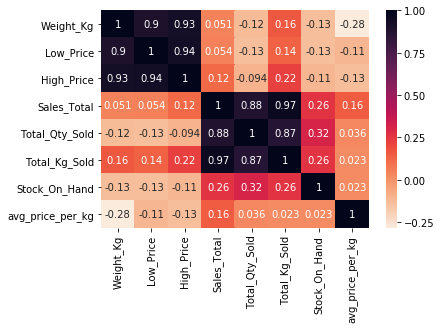

In [15]:
# Checking correlation
corr_mat = train_data.corr()
_ = sns.heatmap(corr_mat, annot=True, cmap=sns.cm.rocket_r)

The strongest correlation we can observe between residential and total units what's logical as residential units variable is main component of the total units. Leaving both mentioned above predictors in the dataset is pointless. Total units do not bring any additional value for the models as it is just a sum of two other variables (strongly correlated with one of them).

All units variables are correlated with gross square feet metric what is in line with our expectations.

Sale price is in the strongest relation with gross square feet column.


Now, let's take a look at the categorical data.

In [81]:
train_data.describe(include='object')

,Province,Container,Size_Grade,Date
count,1453,1453,1453,1453
unique,7,9,10,147
top,CAPE,M4183,1S,2020-04-22
freq,867,510,354,17


Cape is the province where most properties were sold. We have 9 different container categories, however almost a third of the containers belong to 'M4183' category. By far the most common size grade was 1S.

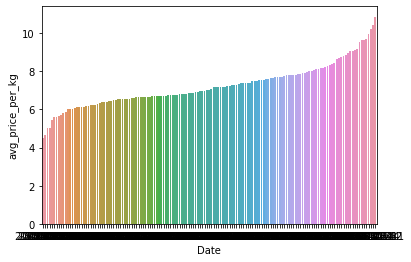

In [83]:
_ = sns.barplot(data=train_data.groupby('Date').agg({'avg_price_per_kg':'median'}).sort_values(by='avg_price_per_kg').reset_index(),\
                x='Date', y='avg_price_per_kg')


Apples in the country are becoming more expensive.

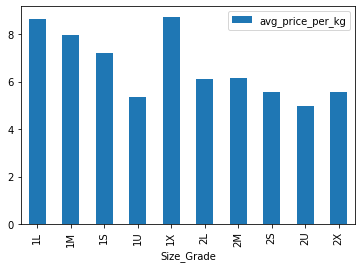

In [84]:
_ = train_data.groupby('Size_Grade').agg({'avg_price_per_kg':'median'}).sort_values(by='Size_Grade').plot(kind='bar')

Furthermore, checking the skewness of our numeric data will be beneficial.

In [783]:
#Weight_Kg	Low_Price	High_Price	Sales_Total	Total_Qty_Sold	Total_Kg_Sold	Stock_On_Hand	avg_price_per_kg
#for column in ['Total_Qty_Sold', 'High_Price', 'Sales_Total', 'Stock_On_Hand', 'Weight_Kg', 'Total_Kg_Sold', 'Low_Price','avg_price_per_kg']:
  #print(f'Skewness - {column}: {train_data[column].skew()}\n')

Skewness - Total_Qty_Sold: 4.445168761533559

Skewness - High_Price: 3.828819042342315

Skewness - Sales_Total: 4.250316771466674

Skewness - Stock_On_Hand: 3.3918148273609603

Skewness - Weight_Kg: 3.3282543410899286

Skewness - Total_Kg_Sold: 5.529585709692451

Skewness - Low_Price: 4.222671981623189

Skewness - avg_price_per_kg: 0.08245241812963358



Skewness is relatively high on most of numeric predictors and we should do something about it.

In [20]:
# Transforming skewed variables distribution
#for column in ['Total_Qty_Sold', 'High_Price', 'Sales_Total', 'Stock_On_Hand']:
  #train_data[column] = np.log1p(train_data[column])

In [73]:
#Weight_Kg	Low_Price	High_Price	Sales_Total	Total_Qty_Sold	Total_Kg_Sold	Stock_On_Hand	avg_price_per_kg
#for column in ['Total_Qty_Sold', 'High_Price', 'Sales_Total', 'Stock_On_Hand', 'avg_price_per_kg']:
  #print(f'Skewness - {column}: {train_data[column].skew()}\n')

Skewness - Total_Qty_Sold: -0.22828787211649557

Skewness - High_Price: 1.4169343397755403

Skewness - Sales_Total: -0.37089478867973075

Skewness - Stock_On_Hand: -0.6561752152613637

Skewness - avg_price_per_kg: 0.29948603446751065



In [4]:
# Saving predictors and target in separate objects
x = train_data.copy()
y = x.pop('avg_price_per_kg')

In [5]:
x.shape

(1952, 12)

## Dummy Variable Encoding

All input data for regression model building purposes needs to be numerical. We therefore have to transform the text data (found within columns such as 'Province','Container', 'Size_Grade', 'Commodities' and 'Date') into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and ***get_dummies*** will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [6]:
dummy_df = pd.get_dummies(x, drop_first = True)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
dummy_df.shape

(1952, 178)

In [15]:
dummy_nonuq = dummy_df.loc[:,dummy_df.nunique() == 1]
dummy_nonuq.columns

Index([], dtype='object')

Suddenly we have many more variable columns (178 given the dummy variable encoding). 

## Feature selection

Feature selection is a technique where we choose those features in our data that contribute most to the target variable. The classes in the sklearn.feature_selection module can be used for feature selection.

Due to dummy variable encoding we have 178 features, however we would like to reduce this number. This will hopefully reduce the chances of our model overfitting on our training data (less redundant data leads to model making decisions based on noise), and not fitting well will test data.

We'll use the selection method SelectKBest.

SelectKBest uses a scoring function either f_regression or mutual_info_regression (for regression problems) along with a k paramater where this paramater will select the top $k^{th}$ features based on their scores which were generated from the scoring function.

F_regression captures linear dependencies, however mutual information can capture any kind of dependencies between variables. Hence, we will use mutual information regression.

In [7]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest

In [37]:
# Creating selector
select = SelectKBest(score_func = mutual_info_regression, k='all')

In [38]:
# Fitting selector
X_reg_new = select.fit_transform(dummy_df, y)

In [39]:
X_reg_new.shape

(1952, 178)

In [40]:
select.scores_

array([6.45633424e-01, 1.69684869e+00, 1.59287547e+00, 4.37746386e-01,
       2.74481016e-01, 3.41141392e-01, 2.68407204e-01, 7.04228210e-02,
       1.08526085e-01, 8.67696057e-04, 2.31636554e-02, 9.10335806e-02,
       5.59126115e-02, 6.55411486e-03, 1.00792810e-01, 5.21847102e-02,
       0.00000000e+00, 1.51929771e-01, 2.60366786e-01, 7.75505147e-02,
       2.18322922e-01, 7.73232710e-03, 0.00000000e+00, 6.39082873e-02,
       1.14782214e-01, 1.13382671e-02, 4.61865192e-02, 2.92098304e-02,
       5.41045895e-02, 9.78392628e-02, 5.46050335e-03, 7.22709643e-04,
       1.02929700e-02, 3.85142865e-03, 0.00000000e+00, 0.00000000e+00,
       9.23348896e-03, 0.00000000e+00, 0.00000000e+00, 6.24066267e-03,
       4.59121615e-03, 3.68089960e-03, 0.00000000e+00, 5.43102749e-03,
       8.03205825e-04, 2.51036024e-03, 5.81055413e-03, 0.00000000e+00,
       0.00000000e+00, 5.44028266e-03, 2.67643199e-03, 0.00000000e+00,
       1.65968035e-03, 1.04229245e-02, 0.00000000e+00, 0.00000000e+00,
      

In [41]:
np.count_nonzero(select.scores_)

111

We see that 111 features has a score > 0. So let's select the top 111 features.

In [42]:
# Creating selector
select = SelectKBest(score_func = mutual_info_regression, k=111)

In [43]:
# Fitting selector
X_reg_new = select.fit_transform(dummy_df, y)

In [44]:
X_reg_new.shape

(1952, 111)

In [45]:
# 111 top feature names
filter = select.get_support()

In [46]:
# create list of top 111 features
kbest_features = list(dummy_df.columns[filter])
kbest_features

['Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'Province_EASTERN CAPE',
 'Province_NATAL',
 'Province_TRANSVAAL',
 'Province_W.CAPE-BERGRIVER ETC',
 'Province_WEST COAST',
 'Container_DT063',
 'Container_EC120',
 'Container_EF120',
 'Container_IA400',
 'Container_JE090',
 'Container_JG110',
 'Container_M4183',
 'Container_M6125',
 'Container_M9125',
 'Size_Grade_1M',
 'Size_Grade_1S',
 'Size_Grade_1U',
 'Size_Grade_1X',
 'Size_Grade_2L',
 'Size_Grade_2M',
 'Size_Grade_2S',
 'Size_Grade_2U',
 'Size_Grade_2X',
 'Date_2019-12-12',
 'Date_2019-12-14',
 'Date_2019-12-30',
 'Date_2020-01-09',
 'Date_2020-01-10',
 'Date_2020-01-14',
 'Date_2020-01-20',
 'Date_2020-01-21',
 'Date_2020-01-24',
 'Date_2020-01-28',
 'Date_2020-01-30',
 'Date_2020-02-01',
 'Date_2020-02-03',
 'Date_2020-02-10',
 'Date_2020-02-11',
 'Date_2020-02-14',
 'Date_2020-02-15',
 'Date_2020-02-19',
 'Date_2020-02-21',
 'Date_2020-02-22',
 'Date_2020-03-11'

In [47]:
kbest_df = pd.DataFrame(data=X_reg_new, columns=kbest_features)
kbest_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_TRANSVAAL,...,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-25,Date_2020-09-01,Date_2020-09-02,Date_2020-09-09,Date_2020-09-17,Date_2020-09-19,Date_2020-09-28
0,18.3,150.0,170.0,51710.0,332.0,6075.6,822.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,11.0,50.0,50.0,16000.0,320.0,3520.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.0,55.0,55.0,990.0,18.0,162.0,1506.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.3,80.0,120.0,32020.0,388.0,7100.4,443.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,400.0,1800.0,1800.0,1800.0,1.0,400.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In the following section, let's try building our model using Linear Regression.

## Create linear model

Let us import some modules.

In [48]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

We'll create two different predictor variable training sets. One set will contain all predictors, and the other will house the kbest features.

In [49]:
X_lin_best = kbest_df
X_lin_all = dummy_df # wanna check if more columns has influences on predictive power
y_lin = y

In [50]:
# Split the data into train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_lin_all, y_lin, test_size = 0.2,random_state=42)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_lin_best, y_lin, test_size = 0.2,random_state=42)

In [52]:
# define model
lm_all = LinearRegression(n_jobs=-1)
lm_best = LinearRegression(n_jobs=-1)

In [53]:
# Train the model
lm_all.fit(X_train_all, y_train_all)
lm_best.fit(X_train_best, y_train_best)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [54]:
# Make predictions
train_pred_all = lm_all.predict(X_train_all)
test_pred_all = lm_all.predict(X_test_all)

train_pred_best = lm_best.predict(X_train_best)
test_pred_best = lm_best.predict(X_test_best)

In [55]:
train_rmse_all = np.sqrt(mean_squared_error(y_train_all, train_pred_all))
test_rmse_all = np.sqrt(mean_squared_error(y_test_all, test_pred_all))
    
train_rmse_best = np.sqrt(mean_squared_error(y_train_best, train_pred_best))
test_rmse_best = np.sqrt(mean_squared_error(y_test_best, test_pred_best))

In [56]:
df = {'Train RMSE all features': train_rmse_all,'Test RMSE all features':test_rmse_all,'Train RMSE kbest features': train_rmse_best,'Test RMSE kbest features':test_rmse_best}
df

{'Train RMSE all features': 1.2139989096502701,
 'Test RMSE all features': 1.4105711751620118,
 'Train RMSE kbest features': 1.302588419561525,
 'Test RMSE kbest features': 1.419213246663244}

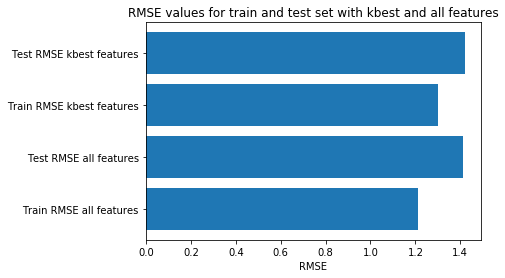

In [63]:
fig, ax = plt.subplots()
RMSE = [1.21, 1.41, 1.30, 1.42]
set_features = ['Train RMSE all features', 'Test RMSE all features', 'Train RMSE kbest features','Test RMSE kbest features']

ax.barh(set_features, RMSE)
ax.set_yticks(set_features)
ax.set_yticklabels(set_features)
ax.set_xlabel('RMSE')
ax.set_title('RMSE values for train and test set with kbest and all features')

plt.show()

**Metrics used**
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 
  

The RMSE on the train set for all features is lower than that of the kbest features, however the RMSE on the test set is similar for both choices of features. This indicates that the model is slightly overfitting when training on all features. Henceforth, we'll be using the kbest features to train our models in order to minimise overfitting.

In the next section, we will try to improve our linear model by introducing regularisation techniques.

# Regularisation

Regularisation is a method used to improve the predictive accuracy of a model while putting constraints on the predictor variables.

Recall that the least squares method seeks to minimise the sum of the squares of the residuals:

$$RSS = \sum_{i=1}^n(y_i-\hat{y}_i)^2$$   

which can be written in terms of the predictor variable coefficients, [$b_1, b_2, b_p$], and slope, $a$:   

$$RSS = \sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2$$

where _n_ is the number of observations, and _p_ is the number of predictor variables. In the case of **ridge regression**, the regression coefficients are calculated as the values that minimise:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^pb_j^2$$

which is rewritten simply as:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

In minimising _RSS_ , we improve the overall fit of the model. In the newly introduced term, $\alpha\sum_{j=1}^pb_j^2$, the intention is to penalise those individual coefficients that get too large (those that contribute the most to reducing the fit).

In the new term, $\alpha$ is a tuning parameter which controls the degree to which the regression coefficients are penalised. The effect of this penalty parameter is to create a tradeoff between how much a coefficient contributes to minimising RSS and the size of the coefficient. In other words: _training fit_ vs. _size of coefficients_. 

In the newly introduced term, we can see that the penalty parameter is applied to the sum of the squares of the coefficients. This means that as we increase the size of the coefficients, the penalty will increase too. And so, this has the effect of _shrinking_ the coefficients towards zero.


Now let's apply ridge regression to our data.

## Ridge Regression

Before we apply ridge regression, we will need to scale our data.

Scaling data is a critical to regularisation as the penalty on particular coefficients in regularisation techniques depends largely on the scale associated with the variables. Regularisation puts constraints on the size of the coefficients related to each variable. Therefore, rescaling is very important for methods with regularisation because the size of the variables affects how much regularisation will be applied to that specific variable. So to make it fair, we need to get all the features on the same scale. 

### Data Scaling

In [57]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

In [58]:
# Split data into predictors and response
X_ridge = X_lin_best
y_ridge = y_lin

In [59]:
# Create scaler object
scaler = StandardScaler()

In [60]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X_ridge)

In [61]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X_ridge.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_TRANSVAAL,...,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-25,Date_2020-09-01,Date_2020-09-02,Date_2020-09-09,Date_2020-09-17,Date_2020-09-19,Date_2020-09-28
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,-0.343488,-0.245547,-0.088,...,-0.081881,-0.093731,-0.075281,-0.093731,-0.071759,-0.075281,11.765567,-0.078648,-0.06415,-0.084994
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,-0.343488,-0.245547,-0.088,...,-0.081881,-0.093731,-0.075281,-0.093731,-0.071759,-0.075281,-0.084994,-0.078648,-0.06415,-0.084994
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-0.343488,-0.245547,-0.088,...,-0.081881,-0.093731,-0.075281,-0.093731,-0.071759,-0.075281,-0.084994,-0.078648,-0.06415,-0.084994
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,-0.343488,-0.245547,-0.088,...,-0.081881,-0.093731,-0.075281,-0.093731,-0.071759,-0.075281,-0.084994,-0.078648,-0.06415,-0.084994
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,2.911310,-0.245547,-0.088,...,-0.081881,-0.093731,-0.075281,-0.093731,-0.071759,-0.075281,-0.084994,-0.078648,-0.06415,11.765567


### Ridge Regression

Now that we've scaled our data, we can split it into a train and test set.

In [64]:
#Split the data into train and test, being sure to use the standardised predictors
X_train_ridge, X_test_ridge, y_train_ridge, y_test_ridge = train_test_split(X_standardise, 
                                                    y_ridge, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [65]:
# Import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [66]:
# Create ridge model
ridge = Ridge()

In [67]:
# Train the model
ridge.fit(X_train_ridge, y_train_ridge)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Assess the predictive accuracy of the Ridge model 
We can make use of the `sklearn.metrics` library to assess the accuracy of our model. For comparison, we'll fit a linear model (without regularisation) to the data.

In [68]:
# Create linear model object
lm = LinearRegression(n_jobs=-1)

# Train linear model on scaled data
lm.fit(X_train_ridge, y_train_ridge)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [69]:
# Check training accuracy
train_lm = lm.predict(X_train_ridge)
train_ridge = ridge.predict(X_train_ridge)

print('Training RMSE')
print('Linear:', np.sqrt(mean_squared_error(y_train_ridge, train_lm)))
print('Ridge :', np.sqrt(mean_squared_error(y_train_ridge, train_ridge)))

Training RMSE
Linear: 1.302588419561525
Ridge : 1.3047795934909416


In [70]:
test_lm = lm.predict(X_test_ridge)
test_ridge = ridge.predict(X_test_ridge)

print('Testing RMSE')
print('Linear:', np.sqrt(mean_squared_error(y_test_ridge, test_lm)))
print('Ridge :', np.sqrt(mean_squared_error(y_test_ridge, test_ridge)))

Testing RMSE
Linear: 1.4192132466632104
Ridge : 1.4180403562768489


There is no significant improvement in the training MSE nor testing MSE when ridge regression is applied. 

Let us try **Lasso Regression** to improve our model.

## Lasso Regression

Recall the optimisation expression for ridge regression:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^pb_j^2)$$

where we attempt to minimise the RSS and some penalty term. This can be rewritten:

$$\min_{\beta} (RSS + \alpha(L2\_norm))$$

where $L2\_norm$ is the sum of the squares of the coefficients.

In LASSO regularisation, we replace the $L2\_norm$ with what is known as the $L1\_norm$: the sum of the _absolute_ values of the coefficients.

This is a relatively recent adaptation of ridge regression which is capable of shrinking predictors to exactly zero - effectively removing them from the model entirely and creating what we call a sparse model (one which uses some subset of all of the available predictors). In this way, LASSO achieves both shrinkage and subset selection.

A LASSO model is fit under the constraint of minimizing the following equation:

$$\sum_{i=1}^n(y_i-(a+\sum_{j=1}^pb_jx_{ij}))^2 + \alpha\sum_{j=1}^p|b_j|$$

which can be rewritten as follows:

$$\min_{\beta} (RSS + \alpha\sum_{j=1}^p|b_j|)$$

or,

$$\min_{\beta} (RSS + \alpha(L1\_norm))$$

### Data Scaling

Again, we will scale our data first.

In [71]:
# Split data into predictors and response
X_feat = X_lin_best
y_tar = y_lin

In [72]:
# Save standardized features into new variable
X_scaled2 = scaler.fit_transform(X_feat)

In [73]:
# Split dataset into train and test sets
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_scaled2, 
                                                    y_tar, 
                                                    test_size=0.20,
                                                    random_state=42)

In [74]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [75]:
# Create LASSO model object (define model), setting alpha to 0.01
lasso = Lasso(alpha=0.01)

In [76]:
# Train the LASSO model
lasso.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X_feat.columns, columns=['Coefficient'])

Lets visualize the predictors that we shrunk to zero.

In [78]:
no = coeff[coeff['Coefficient']==0]
no

,Coefficient
Weight_Kg,-0.0
Container_JE090,0.0
Date_2020-01-14,0.0
Date_2020-01-30,-0.0
Date_2020-02-15,0.0
Date_2020-02-19,-0.0
Date_2020-07-07,-0.0
Date_2020-07-15,-0.0
Date_2020-08-03,-0.0
Date_2020-08-13,0.0


In [79]:
# create list of features that were shrunk to zero
index_list = no.index.tolist()
index_list

['Weight_Kg',
 'Container_JE090',
 'Date_2020-01-14',
 'Date_2020-01-30',
 'Date_2020-02-15',
 'Date_2020-02-19',
 'Date_2020-07-07',
 'Date_2020-07-15',
 'Date_2020-08-03',
 'Date_2020-08-13',
 'Date_2020-08-20',
 'Date_2020-09-01',
 'Date_2020-09-09',
 'Date_2020-09-19',
 'Date_2020-09-28']

### Assessment of predictive accuracy

Again, we'll make use of the `sklearn.metrics` library to assess the accuracy of our model. We'll fit the following models as well, in order to compare the LASSO results thoroughly:

- A least squares model using all available predictors;
- A least squares model using the predictors with non-zero coefficients from LASSO;
- A ridge regression model using all available predictors.

First, we'll create a subset of our data set, removing all predictor variables with a coefficient of zero.

In [80]:
X_subset = X_feat.drop(['Weight_Kg',
 'Container_JE090',
 'Date_2020-01-14',
 'Date_2020-01-30',
 'Date_2020-02-15',
 'Date_2020-02-19',
 'Date_2020-07-07',
 'Date_2020-07-15',
 'Date_2020-08-03',
 'Date_2020-08-13',
 'Date_2020-08-20',
 'Date_2020-09-01',
 'Date_2020-09-09',
 'Date_2020-09-19',
 'Date_2020-09-28'],axis=1)
X_subset.shape

(1952, 96)

In [81]:
# scale subset data
X_subset_scaled = scaler.fit_transform(X_subset)

# create train and test set of the subset data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_subset_scaled, 
                                                        y_tar, 
                                                        test_size=0.20, 
                                                        random_state=1,
                                                        shuffle=False)

# Least squares using non-zero variables from LASSO
lm_subset = LinearRegression()

# Least squares using all predictors
lm_all = LinearRegression()

# Ridge using all predictors
ridge = Ridge()

In [82]:
# Train the models
lm_subset.fit(X_train2, y_train2)
lm_all.fit(X_train_lasso, y_train_lasso)
ridge.fit(X_train_lasso, y_train_lasso)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [83]:
# Make training set predictions for each model
train_lm_subset = lm_subset.predict(X_train2)
train_lm_all = lm_all.predict(X_train_lasso)
train_ridge = ridge.predict(X_train_lasso)
train_lasso = lasso.predict(X_train_lasso)

In [84]:
# Make test set predictions for each model
test_lm_subset = lm_subset.predict(X_test2)
test_lm_all = lm_all.predict(X_test_lasso)
test_ridge = ridge.predict(X_test_lasso)
test_lasso = lasso.predict(X_test_lasso)

In [85]:
# Dictionary of results
results_dict = {'Training RMSE':
                    {
                        "Least Squares, Subset": np.sqrt(mean_squared_error(y_train2, train_lm_subset)),
                        "Least Squares, All": np.sqrt(mean_squared_error(y_train_lasso, train_lm_all)),
                        "Ridge": np.sqrt(mean_squared_error(y_train_lasso, train_ridge)),
                        "LASSO": np.sqrt(mean_squared_error(y_train_lasso, train_lasso))
                    },
                    'Test RMSE':
                    {
                        "Least Squares, Subset": np.sqrt(mean_squared_error(y_test2, test_lm_subset)),
                        "Least Squares, All": np.sqrt(mean_squared_error(y_test_lasso, test_lm_all)),
                        "Ridge": np.sqrt(mean_squared_error(y_test_lasso, test_ridge)),
                        "LASSO": np.sqrt(mean_squared_error(y_test_lasso, test_lasso))
                    }
                }

In [86]:
# Create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)
results_df

,Training RMSE,Test RMSE
LASSO,1.315691,1.403876
"Least Squares, All",1.302588,1.419213
"Least Squares, Subset",1.296786,1.454072
Ridge,1.304780,1.418040


Training the linear model on the subset of data (predictor variables dropped with coefficient = 0) is not a good idea since the difference between the train and test RMSE is the highest, compared to all the other models.

From the above table we can see that the training RMSE actually increased using Lasso regression, however testing RMSE actually decreased, indicating higher predictive accuracy. It seems like the use of regularisation techniques doesn't improve the performance of our model significantly.

We will investigate more complex models in our quest to improve the predictive power of our model.

# Decision Trees

Decision Trees are tree-like (upside down) machine learning models which represent data by partitioning it into different sections based on questions asked of predictive variables in the data. 

In [87]:
# set test size to 20 % of training data
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(X_feat, y_tar, test_size=0.2, random_state=42)

### Building the Decision Tree

In [88]:
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

#### Decision Tree model tuning

Tuning the hyperparamaters of the Decision Tree model is important to obtain optimal performance. Let's create a dictionary that houses a lists of values where we will choose from to tune the hyperparamaters. We will be tuning `max_depth`, `min_samples_leaf` and `min_samples_split`.

In [89]:
param_dist = {'max_depth':list(range(5,15,2)),'min_samples_leaf':list(range(1,5)), 'min_samples_split': list(range(5,30,5))}

In order to find the best combination of hyperparamaters, we will import `GridSearchCV`.

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
regr_tree = DecisionTreeRegressor()
grid = GridSearchCV(regr_tree,param_grid=param_dist, cv=10, n_jobs=-1)

In [93]:
# fit the grid to the train set in order to find best combination of hyperparamters
grid.fit(x_train_dt,y_train_dt)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 7, 9, 11, 13],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             pre_dispatch='2*

In [94]:
# show hyperparamters of DecisionTreeRegressor
grid.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [95]:
# show best r^2 value from combinations available
grid.best_score_

0.8882430259725895

In [96]:
# show best combination of values for hyperparamaters that were investigated
grid.best_params_

{'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}

Now, lets apply these optimal hyperparamaters to our **DecisionTreeRegressor**.

In [97]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=9,min_samples_leaf=4,min_samples_split=10,random_state=42)

In [98]:
# fit and train model
regr_tree.fit(x_train_dt,y_train_dt)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [99]:
# get predictions for train and test data
y_pred_train_dt = regr_tree.predict(x_train_dt)
y_pred_test_dt = regr_tree.predict(x_test_dt)

# calculate MSE
MSE_train_dt = mean_squared_error(y_pred_train_dt, y_train_dt)
MSE_test_dt = mean_squared_error(y_pred_test_dt,y_test_dt)

# Report RMSE
print("Regression Decision Tree model RMSE train is:",np.sqrt(MSE_train_dt))
print("Regression Decision Tree model RMSE test is:",np.sqrt(MSE_test_dt))

Regression Decision Tree model RMSE train is: 0.5266811073163471
Regression Decision Tree model RMSE test is: 0.7405988807556145


The RMSE for the test set improved significantly from 1.40 (Lasso) to 0.74 (Decision Tree), however we would like to improve the RMSE even further. Thus, let's enter the Random Forest... 

# Random Forests

A random forest is a powerful non-parametric algorithm and as mentioned is an example of an **ensemble** method built on decision trees, meaning that it relies on aggregating the results of an ensemble of decision trees. The ensembled trees are randomized and the output is mean prediction of the individual trees.

In [135]:
# set test size to 20 % of training data
x_train_random, x_test_random, y_train_random, y_test_random = train_test_split(X_feat, y_tar, test_size=0.2, random_state=42)

In [101]:
# import RandomForesRegressor
from sklearn.ensemble import RandomForestRegressor

In [102]:
RF = RandomForestRegressor()

#### Model Tuning for Random Forest

In [105]:
# dictionary containing list of values for getting optimal hyperparamaters
param_dist_rf = {'n_estimators': list(range(40,140,40)),'max_features': list(range(30,60,10)),'max_depth': list(range(8,18,3)),'min_samples_split':list(range(5,15,3)), 'min_samples_leaf':list(range(3,5))}

In [106]:
# define grid
grid_rf = GridSearchCV(RF,param_grid=param_dist_rf, cv=10, n_jobs=-1)

In [107]:
# fit and train grid
grid_rf.fit(x_train_random,y_train_random)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [8, 11, 14, 17],
  

In [108]:
# return best r^2 value for optimal combination of hyperparamaters
grid_rf.best_score_

0.899967806977408

In [109]:
# get best combination of hyperparamaters that was tuned
grid_rf.best_params_

{'max_depth': 14,
 'max_features': 50,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 80}

Now, lets apply these optimal hyperparamaters to our **RandomForestRegressor**.

In [136]:
# Instantiate Random Forest model with optimal hyperparamters
RF = RandomForestRegressor(n_estimators=90, max_features = 50, max_depth=14, min_samples_split=5, min_samples_leaf=3, random_state=1)

In [137]:
# fit and train model
RF.fit(x_train_random,y_train_random)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features=50, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [138]:
# training set predictions
train_rf = RF.predict(x_train_random)
# Compute RMSE on train set
print('RMSE',np.sqrt(mean_squared_error(y_train_random, train_rf)))

RMSE 0.46173589728095177


In [139]:
# Get predictions
test_rf = RF.predict(x_test_random)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test_random,test_rf)))

RMSE: 0.5613918254115513


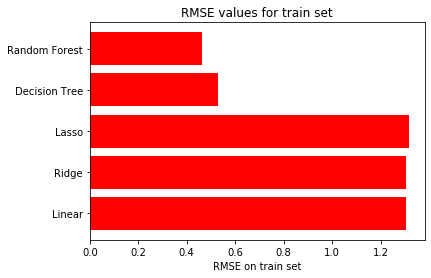

In [140]:
fig, ax = plt.subplots()
train_rmse = [1.303, 1.305, 1.316, 0.527, 0.462]
models = ['Linear', 'Ridge', 'Lasso','Decision Tree', 'Random Forest']

ax.barh(models, train_rmse, color='red')
ax.set_yticks(models)
ax.set_yticklabels(models)
ax.set_xlabel('RMSE on train set')
ax.set_title('RMSE values for train set')

plt.show()

From the above graph we can see that the training RMSE improved significantly with the Decision Tree and Random Forest model.

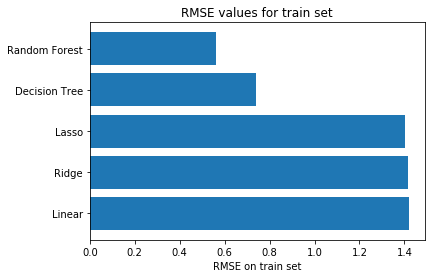

In [141]:
fig, ax = plt.subplots()
train_rmse = [1.419, 1.418, 1.404, 0.741, 0.561]
models = ['Linear', 'Ridge', 'Lasso','Decision Tree', 'Random Forest']

ax.barh(models, train_rmse)
ax.set_yticks(models)
ax.set_yticklabels(models)
ax.set_xlabel('RMSE on train set')
ax.set_title('RMSE values for train set')

plt.show()

From the RMSE of the test set, confirms that the Random Forest model performed the best on data.

# Feature Importance

Feature importance describes which features are relevant. Feature importance can sometimes help with model improvements by implementing the feature selection. The Random Forest algorithm has a built in feature importance method.

The more accurate the model is, the more trustworthy the computed importances are. The computed importances describe how important features are for the machine learning model. It is an approximation of how important features are in the data.

In [142]:
# apply feature importance
feat_imp = RF.feature_importances_
df = pd.DataFrame(feat_imp, index=[X_feat.columns], columns=['Feature Importance'])
df.sort_values('Feature Importance',ascending=False)

,Feature Importance
Low_Price,0.346567
High_Price,0.279337
Weight_Kg,0.126857
Container_IA400,0.077318
Container_M4183,0.031796
Sales_Total,0.030286
Province_NATAL,0.019831
Stock_On_Hand,0.018502
Total_Kg_Sold,0.016722
Total_Qty_Sold,0.013664


# Log Transformation

Log transformations are known to help model performance, especially when the target variable is skewed to the right. From plotting a histogram.

In [788]:
new_x = train_data.copy()
new_y = new_x.pop('avg_price_per_kg')

In [748]:
y_log = np.log1p(new_y)

In [749]:
dummy_df2 = pd.get_dummies(new_x, drop_first = True)
dummy_df2.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [817]:
x_lin_log = kbest_df
y_lin_log = y_log
x_lin_log.shape

(1952, 15)

In [770]:
# Split the data into train and test sets
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_lin_log, y_lin_log, test_size = 0.2,random_state=42)

In [771]:
# Train the model
linear_model.fit(x_train_log, y_train_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [772]:
# Make predictions
train_pred_log = linear_model.predict(x_train_log)
test_pred_log = linear_model.predict(x_test_log)

train_rmse_log = np.sqrt(mean_squared_error(y_train_log, train_pred_log))
test_rmse_log = np.sqrt(mean_squared_error(y_test_log, test_pred_log))

print('train RMSE:', train_rmse_log)
print('test RMSE:', test_rmse_log)

train RMSE: 0.2109795251323446
test RMSE: 0.20622186647238713


log with rf

In [785]:
# Transforming skewed variables distribution
for column in ['Total_Qty_Sold', 'High_Price', 'Sales_Total', 'Stock_On_Hand', 'Weight_Kg', 'Total_Kg_Sold', 'Low_Price']:
  new_x[column] = np.log1p(new_x[column])

In [786]:
dummy_df3 = pd.get_dummies(new_x, drop_first = True)
dummy_df3.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,2.960105,5.017280,5.141664,10.853426,5.808142,8.712201,6.712956,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,2.484907,3.931826,3.931826,9.680406,5.771441,8.166500,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,2.302585,4.025352,4.025352,6.898715,2.944439,5.093750,7.317876,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2.960105,4.394449,4.795791,10.374147,5.963579,8.868047,6.095825,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,5.993961,7.496097,7.496097,7.496097,0.693147,5.993961,1.098612,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [789]:
x_log_rf = select.fit_transform(dummy_df3, new_y)

In [790]:
kbest_df2 = pd.DataFrame(data=x_log_rf, columns=kbest_features)
kbest_df2.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_NATAL,Container_EC120,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Size_Grade_1S,Size_Grade_2S
0,2.960105,5.017280,5.141664,10.853426,5.808142,8.712201,6.712956,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.484907,3.931826,3.931826,9.680406,5.771441,8.166500,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.302585,4.025352,4.025352,6.898715,2.944439,5.093750,7.317876,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2.960105,4.394449,4.795791,10.374147,5.963579,8.868047,6.095825,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,5.993961,7.496097,7.496097,7.496097,0.693147,5.993961,1.098612,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [791]:
x_rf_log = kbest_df2

In [794]:
# Split the data into train and test sets
x_train_rflog, x_test_rflog, y_train_rflog, y_test_rflog = train_test_split(x_rf_log, new_y, test_size = 0.2,random_state=42)

In [806]:
# Instantiate Random Forest model with optimal hyperparamters
RF_log = RandomForestRegressor(n_estimators=120, max_features = 8, max_depth=12, min_samples_split=10, min_samples_leaf=2, random_state=1)

In [807]:
# fit and train model
RF_log.fit(x_train_rflog,y_train_rflog)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [808]:
# training set predictions
train_rflog = RF_log.predict(x_train_rflog)
# Compute RMSE on train set
print('RMSE',np.sqrt(mean_squared_error(y_train_rflog, train_rflog)))

RMSE 0.45910808951230697


In [809]:
# Get predictions
test_rflog = RF_log.predict(x_test_rflog)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test_rflog,test_rflog)))

RMSE: 0.548153240906519


# Predicting on the test data

### Preprocessing

In [76]:
test = pd.read_csv(r'https://raw.githubusercontent.com/CPNMorgan/sharing-github/main/df-test_set.csv')

In [77]:
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [78]:
test_index = test['Index']
test = test.drop(['Commodities','Index'], axis=1)

In [79]:
test.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [80]:
test.shape

(685, 11)

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 11 columns):
Province          685 non-null object
Container         685 non-null object
Size_Grade        685 non-null object
Weight_Kg         685 non-null float64
Date              685 non-null object
Low_Price         685 non-null float64
High_Price        685 non-null float64
Sales_Total       685 non-null float64
Total_Qty_Sold    685 non-null int64
Total_Kg_Sold     685 non-null float64
Stock_On_Hand     685 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 58.9+ KB


In [82]:
new_train = train_data.drop('avg_price_per_kg',axis=1)
new_train.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2


In [83]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 11 columns):
Province          1952 non-null object
Container         1952 non-null object
Size_Grade        1952 non-null object
Weight_Kg         1952 non-null float64
Date              1952 non-null object
Low_Price         1952 non-null float64
High_Price        1952 non-null float64
Sales_Total       1952 non-null float64
Total_Qty_Sold    1952 non-null int64
Total_Kg_Sold     1952 non-null float64
Stock_On_Hand     1952 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 183.0+ KB


In [84]:
vertical_stack = pd.concat([new_train,test],axis=0)
vertical_stack.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 1 to 684
Data columns (total 11 columns):
Province          2637 non-null object
Container         2637 non-null object
Size_Grade        2637 non-null object
Weight_Kg         2637 non-null float64
Date              2637 non-null object
Low_Price         2637 non-null float64
High_Price        2637 non-null float64
Sales_Total       2637 non-null float64
Total_Qty_Sold    2637 non-null int64
Total_Kg_Sold     2637 non-null float64
Stock_On_Hand     2637 non-null int64
dtypes: float64(5), int64(2), object(4)
memory usage: 247.2+ KB


In [85]:
vertical_stack.head()

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
1,CAPE,M4183,1L,18.3,2020-09-09,150.0,170.0,51710.0,332,6075.6,822
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,2020-04-16,55.0,55.0,990.0,18,162.0,1506
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443
69,EASTERN CAPE,IA400,1S,400.0,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2


In [86]:
X_real = pd.get_dummies(vertical_stack,drop_first=True)
X_real.shape

(2637, 178)

In [87]:
df_test = X_real.iloc[1952:,:]
df_test.shape

(685, 178)

In [88]:
df_test.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
play = df_test.loc[:,df_test.nunique() == 1]
play.columns

Index(['Date_2020-01-21', 'Date_2020-02-08', 'Date_2020-09-16'], dtype='object')

In [124]:
non_uniq_df = df_test.drop(['Date_2020-01-21', 'Date_2020-02-08'],axis=1)
non_uniq_df.shape

(685, 173)

Make dataframe consisting of kbest columns

In [89]:
test_kbest_rf = pd.DataFrame(data = df_test, columns=['Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'Province_EASTERN CAPE',
 'Province_NATAL',
 'Province_ORANGE FREE STATE',
 'Province_TRANSVAAL',
 'Province_W.CAPE-BERGRIVER ETC',
 'Province_WEST COAST',
 'Container_DT063',
 'Container_EC120',
 'Container_EF120',
 'Container_IA400',
 'Container_JE090',
 'Container_JG110',
 'Container_M4183',
 'Size_Grade_1M',
 'Size_Grade_1S',
 'Size_Grade_1X',
 'Size_Grade_2L',
 'Size_Grade_2M',
 'Size_Grade_2S',
 'Size_Grade_2U',
 'Size_Grade_2X',
 'Date_2019-12-12',
 'Date_2019-12-30',
 'Date_2020-01-03',
 'Date_2020-01-04',
 'Date_2020-01-09',
 'Date_2020-01-11',
 'Date_2020-01-14',
 'Date_2020-01-23',
 'Date_2020-01-24',
 'Date_2020-01-28',
 'Date_2020-02-01',
 'Date_2020-02-06',
 'Date_2020-02-10',
 'Date_2020-02-11',
 'Date_2020-02-12',
 'Date_2020-02-15',
 'Date_2020-02-19',
 'Date_2020-02-21',
 'Date_2020-02-26',
 'Date_2020-02-27',
 'Date_2020-03-04',
 'Date_2020-03-09',
 'Date_2020-03-10',
 'Date_2020-03-11',
 'Date_2020-03-13',
 'Date_2020-03-14',
 'Date_2020-03-16',
 'Date_2020-03-17',
 'Date_2020-03-20',
 'Date_2020-03-27',
 'Date_2020-04-07',
 'Date_2020-04-14',
 'Date_2020-04-16',
 'Date_2020-04-17',
 'Date_2020-04-23',
 'Date_2020-04-28',
 'Date_2020-04-29',
 'Date_2020-05-06',
 'Date_2020-05-07',
 'Date_2020-05-18',
 'Date_2020-05-25',
 'Date_2020-05-26',
 'Date_2020-05-27',
 'Date_2020-05-29',
 'Date_2020-06-09',
 'Date_2020-06-13',
 'Date_2020-06-17',
 'Date_2020-06-25',
 'Date_2020-06-27',
 'Date_2020-07-01',
 'Date_2020-07-09',
 'Date_2020-07-13',
 'Date_2020-07-15',
 'Date_2020-07-16',
 'Date_2020-07-17',
 'Date_2020-07-20',
 'Date_2020-07-21',
 'Date_2020-07-25',
 'Date_2020-07-27',
 'Date_2020-07-28',
 'Date_2020-07-29',
 'Date_2020-08-04',
 'Date_2020-08-06',
 'Date_2020-08-11',
 'Date_2020-08-15',
 'Date_2020-08-18',
 'Date_2020-08-25',
 'Date_2020-09-02',
 'Date_2020-09-16',
 'Date_2020-09-23',
 'Date_2020-09-28',
 'Date_2020-10-03'])

In [773]:
test_log_df = pd.DataFrame(data = df_test, columns=['Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold',
 'Stock_On_Hand',
 'Province_NATAL',
 'Container_EC120',
 'Container_IA400',
 'Container_JE090',
 'Container_JG110',
 'Container_M4183',
 'Size_Grade_1S',
 'Size_Grade_2S'])

In [774]:
test_log_df.shape

(685, 15)

In [810]:
rflog_df = test_log_df.copy()

In [811]:
# Transforming skewed variables distribution
for column in ['Total_Qty_Sold', 'High_Price', 'Sales_Total', 'Stock_On_Hand', 'Weight_Kg', 'Total_Kg_Sold', 'Low_Price']:
  rflog_df[column] = np.log1p(rflog_df[column])

In [81]:
test_scaled = scaler.fit_transform(df_test)

### Making predictions

In [50]:
predictions = model.predict(df_test)
predictions

array([ 9.18188366, 10.27494758,  8.57659107,  7.70483434,  7.25520315,
        4.73481625,  4.75084397,  7.75576638,  8.67191653,  7.6346783 ,
        5.12021273,  6.24736614,  8.73253505,  4.87500357,  2.95650265,
        6.86708491,  8.00818715,  4.97764762, 10.70233681,  6.80091732,
        5.57980254,  4.87359873,  7.36306879,  6.7817892 ,  4.02398791,
        6.71001866,  6.85146333,  8.07958237,  7.86026045,  7.95531529,
        7.95025626,  4.46977606,  9.30012759,  8.21603783,  3.9141331 ,
        8.5906737 ,  9.39817007, 10.0576688 ,  6.60765402,  7.30634912,
        9.58675795,  8.0274516 ,  9.14228551,  5.25170255,  6.57387417,
        5.12105482,  4.5218955 ,  6.55902698,  6.22161871,  4.188634  ,
        0.81827874,  5.31583893,  8.08320176, 10.5998903 ,  8.48057032,
        6.2075658 ,  8.41673573,  9.24145861,  9.22038069,  8.45490494,
        8.83662599,  9.75735454,  4.77552815,  8.40884832,  8.78434053,
        6.14431373,  4.44437181,  4.31138071,  7.01033888,  7.01

In [91]:
predict2 = lasso.predict(test_scaled)
predict2

array([ 9.10120741,  9.75501286,  8.32511965,  8.4044834 ,  7.79846321,
        3.97443983,  4.95658089,  7.81805048,  8.21452398,  7.47487093,
        4.88717618,  5.67819135,  9.12898803,  5.37421059,  2.04803718,
        6.71996762,  7.85532089,  4.03623536, 10.1275658 ,  6.13006273,
        5.42238169,  4.31523768,  7.0728233 ,  6.93262758,  4.81383525,
        6.41112188,  7.24508268,  8.30857072,  7.72777641,  7.77151864,
        7.6004233 ,  4.93616582,  8.79064466,  8.29878216,  3.21607243,
        7.96351612,  8.58734748, 11.74456138,  6.50903177,  7.13138279,
        9.11046874,  8.34350676,  9.18894735,  5.2347237 ,  6.28214607,
        4.61495614,  3.62211272,  6.4199652 ,  6.20102619,  2.95049371,
       -0.37776704,  5.76236624,  8.13702176, 11.13496763,  7.86377242,
        6.40244739,  8.19724527,  8.81668121,  9.07374091,  8.50073596,
        8.62259412, 10.36342476,  5.30938018,  8.04783693,  8.5827251 ,
        6.06369398,  4.72324959,  4.2761111 ,  6.08282271,  6.66

In [177]:
predict_rf = RF.predict(test_df)
predict_rf

array([10.77644975, 12.14590576,  9.97549255,  8.5948303 ,  8.10040012,
        4.42946492,  3.71677569,  7.30864075,  8.72833138,  9.50148069,
        4.69044407,  5.49148698,  8.91761713,  4.23949761,  4.54745192,
        6.11847551,  7.765262  ,  4.48335233, 10.70093849,  6.01085108,
        5.40808352,  4.71534517,  5.41580562,  7.8301805 ,  5.58345151,
        6.24356804,  7.63347646,  7.97938396,  7.53717523,  7.08791599,
        8.0791792 ,  5.69132959,  9.69790059,  7.69263272,  4.70555045,
        9.90950756, 10.93277932, 11.35860718,  6.32571465,  6.31087527,
        8.11286982,  7.92933178,  5.47243641,  6.2113724 ,  5.55651047,
        5.1339572 ,  5.00040413,  5.54507007,  6.06126753,  4.68671022,
        1.50336333,  6.29089625,  6.407659  , 13.23461786,  8.44810676,
        5.88430868, 10.8803146 ,  8.8532196 ,  8.27047354,  6.06875439,
        7.40147021, 11.08952383,  6.22296157,  9.15412111,  6.30822987,
        6.03652856,  6.84978583,  5.20608274,  5.51617469,  7.10

In [758]:
predict_lm_log = linear_model.predict(test_log_df)
predict_lm_log

array([2.28877411, 2.32292487, 2.25941888, 2.20244829, 2.23909085,
       1.7501864 , 1.80760276, 2.17231137, 2.24797748, 2.29780623,
       2.01562347, 2.07510684, 2.25690788, 1.78666687, 1.43316887,
       2.04493165, 2.12930141, 1.77151138, 2.45168668, 1.96911398,
       1.86947475, 1.78349865, 1.96625469, 2.02854555, 1.72910921,
       2.02787895, 2.10433408, 2.23076647, 2.23348028, 2.1943849 ,
       2.12990149, 1.78762327, 2.32373231, 2.14926699, 1.60299993,
       2.25245747, 2.22486365, 2.37747126, 1.99508713, 2.04903286,
       2.2775253 , 2.24035326, 2.25448719, 1.85733022, 1.94094556,
       1.77916723, 1.64510349, 1.99957205, 1.94429796, 1.63472617,
       0.76473414, 1.82266596, 2.1205399 , 2.39993021, 2.2597675 ,
       1.91521906, 2.23716276, 2.35921579, 2.3102163 , 2.22047612,
       2.28104064, 2.38570733, 1.79435698, 2.20571788, 2.27420485,
       1.89712828, 1.8239105 , 1.79913867, 2.04810603, 1.96904556,
       2.10947676, 1.86560575, 1.94994263, 2.08513618, 1.84309

In [759]:
predict_lm_log = np.expm1(predict_lm_log)
predict_lm_log

array([ 8.86283952,  9.20548037,  8.57752182,  8.04713641,  8.38479524,
        4.75567541,  5.09581677,  7.77855106,  8.46856608,  8.95232542,
        6.50540532,  6.96539745,  8.55350287,  4.96952205,  3.19196194,
        6.72863028,  7.40899034,  4.87973318, 10.6079091 ,  6.16432593,
        5.48488929,  4.95063924,  6.14387033,  6.60302013,  4.63563151,
        6.59795359,  7.20163957,  8.30699688,  8.33228857,  7.97447916,
        7.41403786,  4.97523406,  9.21372407,  7.57856788,  3.9679135 ,
        8.51108037,  8.2522212 ,  9.77761462,  6.35284367,  6.76039212,
        8.75251602,  8.39665012,  8.53040474,  5.40660966,  5.96533398,
        4.92492027,  4.18154614,  6.38589465,  5.98872375,  4.12805361,
        1.14842312,  5.18833431,  7.33563666, 10.02240714,  8.58086133,
        5.78842572,  8.36671788,  9.58264917,  9.076604  ,  8.2117157 ,
        8.78685974,  9.86674629,  5.01560535,  8.07676523,  8.72018692,
        5.66672195,  5.19604074,  5.04443898,  6.75320285,  6.16

In [775]:
predict_lmk15_log = linear_model.predict(test_log_df)
predict_lmk15_log

array([2.18283312, 2.2099005 , 2.11275479, 2.1707959 , 2.18398643,
       1.8219059 , 1.78990431, 2.19665072, 2.20897424, 2.180855  ,
       1.94274631, 2.07490526, 2.17744876, 1.93545092, 1.38189251,
       1.94853105, 2.22672382, 1.92693104, 2.37166021, 1.90165444,
       1.8316611 , 1.74417269, 1.94369654, 1.95283833, 1.94396482,
       2.14217152, 2.16300266, 2.2015406 , 2.16692123, 2.28416095,
       2.18059167, 1.78129734, 2.2112207 , 2.11243396, 1.62959343,
       2.18355835, 2.22116032, 2.33795437, 1.89179997, 2.09469655,
       2.21758168, 2.24737944, 2.13057147, 1.94685625, 1.84542677,
       1.92344495, 1.84456798, 1.92576026, 1.8316631 , 1.55949522,
       0.70240617, 1.94668681, 2.16150235, 2.24035762, 2.14846297,
       2.08760619, 2.12661096, 2.33350629, 2.20100954, 2.14281641,
       2.21737005, 2.333287  , 1.94457043, 2.22742798, 2.14929996,
       1.87548844, 1.94843039, 1.76522074, 2.09156781, 2.15426416,
       2.13475472, 1.93002734, 2.11418902, 2.09979917, 1.84533

In [776]:
predict_lmk15_log = np.expm1(predict_lmk15_log)
predict_lmk15_log

array([ 7.87140445,  8.11480946,  7.27099481,  7.76525756,  7.88164184,
        5.18363259,  4.98887938,  7.99483673,  8.10637062,  7.85387307,
        5.97788813,  6.96379196,  7.82376599,  5.92716696,  2.98243129,
        6.01837037,  8.26944787,  5.868399  ,  9.71516694,  5.69696498,
        5.24425037,  4.72116634,  5.98452188,  6.04866568,  5.98639593,
        7.51791439,  7.69721322,  8.03892813,  7.73136073,  8.81744546,
        7.8515419 ,  4.93755446,  8.12685074,  7.26834164,  4.10180008,
        7.87784056,  8.21802053,  9.36002212,  5.63129408,  7.12297565,
        8.18509153,  8.46290516,  7.41967702,  6.00662582,  5.33080102,
        5.84449685,  5.32536652,  5.86036237,  5.24426287,  3.75641971,
        1.01860398,  6.00543875,  7.6841745 ,  8.39669115,  7.57167338,
        7.06558456,  7.38639678,  9.31404223,  8.03412925,  7.52340925,
        8.18314786,  9.31178067,  5.99062828,  8.27597734,  7.57885071,
        5.52400491,  6.01766392,  4.84286199,  7.09760074,  7.62

In [812]:
predict_logk15_rf = RF_log.predict(rflog_df)
predict_logk15_rf

array([10.30603486, 11.97207369,  9.82122004,  8.68506152,  8.05089021,
        7.84841417,  3.96704983,  7.29397492,  8.67479007,  9.42984578,
        4.33125656,  8.77175426,  8.94627962,  4.02668351,  4.24632278,
        5.4107805 ,  7.6391963 ,  4.21559786, 10.82980893,  5.36596372,
        5.0390412 ,  7.97044316,  5.01568349,  6.27430756,  5.00923507,
        5.93713141,  7.02446665,  7.97066514,  7.42921577,  7.07245761,
        7.95137867,  6.151412  ,  9.75396169,  7.64544763,  7.86972036,
        9.77994614, 10.8583205 , 11.27471357,  6.81882527,  6.38302596,
        8.15290638,  7.84281847,  5.47375593,  5.51069267,  4.98171603,
        4.78016087,  8.16318749,  4.87361682,  5.33138795,  7.78460318,
        6.02351211,  5.41609511,  6.41831874, 13.85102999,  8.09740543,
        5.82822255, 10.57363171,  8.82151922,  7.99010939,  6.05357948,
        7.37728711, 11.22643612,  5.44906643,  9.15511536,  6.38075967,
        6.64398537,  5.90207845,  4.71067329,  8.53641923,  6.91

In [90]:
predict_kb100_rf = RF.predict(test_kbest_rf)
predict_kb100_rf

array([10.77012415, 11.84944815,  9.99040627,  8.58452078,  8.01349296,
        4.44271106,  3.82214939,  7.44044599,  8.80662978,  9.42673768,
        4.85813897,  5.47708576,  8.90806786,  4.22044048,  4.56355889,
        6.10545547,  7.76769494,  4.51151136, 10.53720347,  6.12283425,
        5.55570106,  4.77869706,  5.49629682,  7.86154593,  5.57250979,
        6.29330505,  7.65009978,  7.9098432 ,  7.48798003,  7.09059434,
        8.10718178,  5.61899149,  9.80986076,  7.66306194,  4.74674259,
        9.77013755, 10.92565518, 11.18413824,  6.34806181,  6.42805053,
        8.09832009,  7.98832964,  5.69699448,  6.20776586,  5.54795939,
        5.07741379,  5.01144805,  5.51160805,  6.09136285,  4.679689  ,
        1.51185252,  6.28885685,  6.47478013, 13.15662635,  8.4056205 ,
        5.92746086, 10.85883971,  9.01352752,  7.95166017,  6.05117175,
        7.34355576, 11.08801718,  6.17436129,  9.11555254,  6.34330491,
        6.2153123 ,  6.86794543,  5.13187042,  5.40640926,  7.12

## Submission



In [100]:
submission = pd.DataFrame(
    {'Index': test_index,
     'ave_price_per_kg': predictions
    })

In [101]:
submission.head()

,Index,Price
0,1,9.181884
1,2,10.274948
2,3,8.576591
3,4,7.704834
4,5,7.255203


In [164]:
# save DataFrame to csv file for submission
submission.to_csv("Team_TS5_Regression.csv", index=False)

In [96]:
submission2 = pd.DataFrame(
    {'Index': test_index,
     'avg_price_per_kg': predict2
    })

In [97]:
submission2.tail()

,Index,avg_price_per_kg
680,681,5.731757
681,682,8.085623
682,683,5.135878
683,684,8.044346
684,685,7.800376


In [98]:
# save DataFrame to csv file for submission
submission2.to_csv("Team_TS5_Regression.csv", index=False)

In [180]:
submission_rf_kbest15 = pd.DataFrame({'Index': test_index,'avg_price_per_kg':predict_rf})

In [181]:
submission_rf_kbest15.tail()

,Index,avg_price_per_kg
680,681,3.516637
681,682,8.286924
682,683,6.126417
683,684,7.353712
684,685,7.344142


In [182]:
submission_rf_kbest15.to_csv('Team_TS5_Regression_kbest15.csv', index=False)

submission for linear model, y log transformed, kbest=100

In [760]:
submission_lmlog_kbest100 = pd.DataFrame({'Index': test_index,'avg_price_per_kg':predict_lm_log})

In [761]:
submission_lmlog_kbest100.tail()

,Index,avg_price_per_kg
680,681,5.818328
681,682,8.307610
682,683,5.173857
683,684,8.060588
684,685,7.182324


In [762]:
submission_lmlog_kbest100.to_csv('Team_TS5_Regression_kbest100_lmlog.csv', index=False)

In [778]:
sub_lmlog_kbest15 = pd.DataFrame({'Index': test_index,'avg_price_per_kg':predict_lmk15_log})

In [779]:
sub_lmlog_kbest15.tail()

,Index,avg_price_per_kg
680,681,5.156368
681,682,7.855893
682,683,5.988378
683,684,7.466456
684,685,8.030278


In [782]:
sub_lmlog_kbest15.to_csv('TS5_kbest15_lmlog.csv',index=False)

submission for random forest model, bestk = 15, log on x variables numeric

In [813]:
sub_rflog_kbest15 = pd.DataFrame({'Index': test_index,'avg_price_per_kg':predict_logk15_rf})

In [814]:
sub_rflog_kbest15.tail()

,Index,avg_price_per_kg
680,681,3.502020
681,682,7.757859
682,683,5.380002
683,684,7.188753
684,685,7.225347


In [815]:
sub_rflog_kbest15.to_csv('TS5_kbest15_rflog.csv',index=False)

In [91]:
sub_rf_kbest100 = pd.DataFrame({'Index': test_index,'avg_price_per_kg':predict_kb100_rf})

In [92]:
sub_rf_kbest100.tail()

,Index,avg_price_per_kg
680,681,3.494555
681,682,8.520330
682,683,6.099045
683,684,7.253306
684,685,7.354953


In [93]:
sub_rf_kbest100.to_csv('TS5_kbest100_rf.csv',index=False)

In [29]:
import pickle

model_save_path = "lin_mod.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lm,file)

## Conclusion